In [12]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
np.random.seed(842424)

In [15]:
nSamples = 1000
inputDim = 2
outputDim = 1
batchSize = 50
nEpochs = 100

In [4]:
x1 = np.random.normal(1., 0.25, (nSamples//2, inputDim))
x2 = np.random.normal(2., 0.30, (nSamples//2, inputDim))
y1 = np.zeros(nSamples//2)
y2 = np.ones(nSamples//2)
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

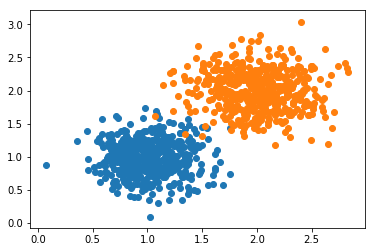

In [5]:
plt.scatter(*zip(*x1))
plt.scatter(*zip(*x2))

In [9]:
shuffled = np.arange(nSamples)
np.random.shuffle(shuffled)
xs = x[shuffled]
ys = y[shuffled]

(1000,)

In [7]:
model = Sequential()
model.add(Dense(outputDim, input_dim=inputDim, activation='sigmoid'))

In [17]:
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [18]:
fit = model.fit(xs, ys, batch_size=batchSize, epochs=nEpochs)

Epoch 1/100
1000/1000 [==============================] - 0s 74us/step - loss: 0.1490 - acc: 0.8720
Epoch 2/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1485 - acc: 0.8720
Epoch 3/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.1481 - acc: 0.8750
Epoch 4/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1476 - acc: 0.8780
Epoch 5/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1471 - acc: 0.8780
Epoch 6/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.1467 - acc: 0.8820
Epoch 7/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.1462 - acc: 0.8860
Epoch 8/100
1000/1000 [==============================] - 0s 18us/step - loss: 0.1457 - acc: 0.8860
Epoch 9/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.1453 - acc: 0.8870
Epoch 10/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1448 - acc: 0.8880
Epoch 11/

1000/1000 [==============================] - 0s 16us/step - loss: 0.1170 - acc: 0.9620
Epoch 84/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1167 - acc: 0.9620
Epoch 85/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.1164 - acc: 0.9620
Epoch 86/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1161 - acc: 0.9630
Epoch 87/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1158 - acc: 0.9640
Epoch 88/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1155 - acc: 0.9640
Epoch 89/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1151 - acc: 0.9650
Epoch 90/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.1148 - acc: 0.9650
Epoch 91/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1145 - acc: 0.9650
Epoch 92/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.1142 - acc: 0.9650
Epoch 93/100


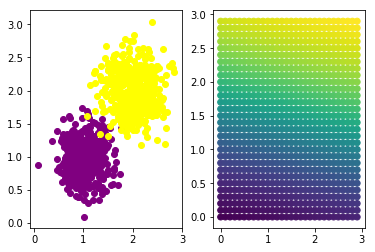

In [45]:
ls = np.zeros((30, 30))
ms = np.zeros((30, 30))
ns = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        ms[i, j] = i/10
        ns[i, j] = j/10
        ls[i, j] = model.predict(np.array([ms[i, j], ns[i, j]]).reshape((1, 2)))
        pass
    pass
ms.flatten()
ns.flatten()
ls.flatten()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(*zip(*x1), c='purple')
ax1.scatter(*zip(*x2), c='yellow')
# ax1.scatter(ms, ns, c=ls)

# ax2.scatter(*zip(*x1))
# ax2.scatter(*zip(*x2))
ax2.scatter(ms, ns, c=ls)
# ax2.scatter(ms, ns, c=np.rint(ls))
